# Django 4일차

```
지금까지 한것

1. settings - urls - 앱의urls - views - template

2. form 태그 사용해서 throw catch 다른페이지로 값 전달하고 받기 

2. modle class 작성-스키마 정의해주고 
   클래스변수 - 필드하나 만들기
   makemigrations // migrate
   
-------------------------------------------------------------------------------------------------
3.

1 admin 사이트 만들기		[1~9 page]
   http://localhost:8000/admin/

2 인덱스 페이지 만들기 (전체 게시글 조회)		[18~20 page]
   http://localhost:8000/articles/index/

3 게시글 별 디테일 페이지 만들기 ( 땡 번째 게시글 만들기 ) - variable routing		[21~25 page]
   http://localhost:8000/articles/5/   

4. 인덱스 페이지에서 게시글 제목 클릭하면 해당 게시글의 디테일 페이지로 넘어가기	[26~28 page]

5. 인덱스 페이지에서 게시글 새로 작성하기 (creat)		[29~60 page]
    4-1 게시글 작성할 폼을 띄우고 (GET) --> new 함수
    4-2 작성한 글을 DB에 저장하기 (POST) ---> create 함수 
	( post 시 보안을 위해서 csrf 토큰 태그 반드시! 달아주기 )
            ( redirect 해보기 )

6. 게시글 지우기 ( 해당 게시글 접근해서 delete 버튼 누르기 ) 		[61~66 page]

7. 게시글 수정하기 		[67~72 page]
    7-1 게시글 작성할 폼을 띄우고 (GET) + 그전에 작성했던 data 도 같이 띄우기 --> edit 함수
    7-2 수정한 게시글 DB에 저장히기  ---> update 함수

8. 그런데 create / update 하는데 views 함수를 2개 써줄 것이 아니라 하나로 합쳐서 쓰자.

   예> 8-1 create

    create 할떄 get (new 함수) 따로 
                   post (create 함수) 따로 써주는 것이 아니라 

     if else를 사용해서 하나의 함수로 합쳐주자 

                    if - http method가 "POST" 일때!!!!

                    else - "GET" 일때!!!!

------------------------------------------------------------------------------------

   예> 8-2 update 

    update 할떄 get (edit 함수) 따로 
                   post (update 함수) 따로 써주는 것이 아니라 

     if else를 사용해서 하나의 함수로 합쳐주자 

                    if - http method가 "POST" 일때!!!!

                    else - "GET" 일때!!!!    

------------------------------------------------------------------------------------

```

### Admin site

<b>개요</b>  

<mark>Django의 가장 강력한 기능 중 하나</mark>인 automatic admin interface  

"관리자 페이지"  

- 사용자가 아닌 서버의 관리자가 활용하기 위한 페이지  
- 모델 class를 admin.py에 등록하고 관리  
- 레코드 생성 여부 확인에 매우 유용하며 직접 레코드를 삽입할 수도 있음  


&nbsp;

<b>admin 계정 생성</b>  

```
python manage.py createsuperuser
```

username과 password를 입력해 관리자 계정을 생성  

&nbsp;

<b>admin site 로그인</b>  

http://127.0.0.1:8000/admin/ 로 접속 후 로그인  

계정만 만든 경우 Django 관리자 화면에서 모델 클래스는 보이지 않음  

&nbsp;

<b>admin에 모델 클래스 등록</b>  

모델의 record를 보기 위해서는 admin.py에 등록 필요  

```
# articles/admin.py

from django.contrib import admin  
from .model import Article

admin.site.register(Article)
```

### CRUD with view functions

<b>개요</b>  

이전에 익힌 QuerySet API를 통해 view 함수에서 직접 CRUD 구현하기  

### 번외

models.py에서 DB를 변경할 때는 migrate가 필요하나, method는 DB에 적용되지 않으므로 migrate 필요 X

### READ1 (index page)

<b>전체 게시글 조회</b>  

index 페이지에서는 전체 게시글을 조회해서 출력한다.  

```
# articles/views.py

from django.shortcuts import render
from .models import Article

def index(request):
    articles = Article.objects.all()

    context = {
        'articles': articles
    }

    return render(request, 'articles/index.html', context)

# articles/templates/articles/index.html

{% extends 'base.html' %}

{% block content %}
  <h1>INDEX</h1>
  <hr>
  
  {% for article in articles %}
    <p>글 번호: {{ article.id }}</p>
    <p>글 제목: {{ article.title }}</p>
    <p>글 내용: {{ article.content }}</p>
    <hr>
    {% endfor %}
{% endblock content %}
```

### READ (detail page)

<b>개요</b>  

개별 게시글 상세 페이지 제작  

모든 게시글 마다 뷰 함수와 템플릿 파일을 만들 수는 없음  
- 글의 번호(pk)를 활용해서 하나의 뷰 함수와 템플릿 파일로 대응  

무엇을 활용할 수 있을까?  
- Variable Routing  



<b>urls</b>  

URL로 특정 게시글을 조회할 수 있는 번호를 받음  

```
# aritcles/urls.py

from django.urls import path
from . import views

app_name = 'articles'

urlpatterns = [
    path('', views.index, name = 'index'),
    path('<int:pk>/', views.detail, name = 'detail'),
]
```

&nbsp;

<b>views</b>  

Aritcle.objects.get(pk=pk)에서 오른쪽 pk는 variable routing을 통해 받은 pk, 왼쪽 pk는 DB에 저장된 레코드의 id 컬럼  

```
# articles/views.py

...

def detail(request, pk):

    article = Article.objects.get(id=pk) # pk=pk, id=id, pk=id

    context = {
        'article': article,

    }

    return render(request, 'articles/detail.html', context)

```

&nbsp;

<b>templates</b>  

```
# articles/templates/articles/detail.html

{% extends 'base.html' %}

{% block content %}
  <h1>DETAIL</h1>
  <hr>

    <p>글 제목: {{ article.title }}</p>
    <p>글 내용: {{ article.content }}</p>
    <p>글 생성시각: {{ article.created_at }}</p>
    <p>글 수정시각: {{ article.updated_at }}</p>

    <a href="{% url 'articles:index' %}">목록보기</a>
{% endblock content %}

```

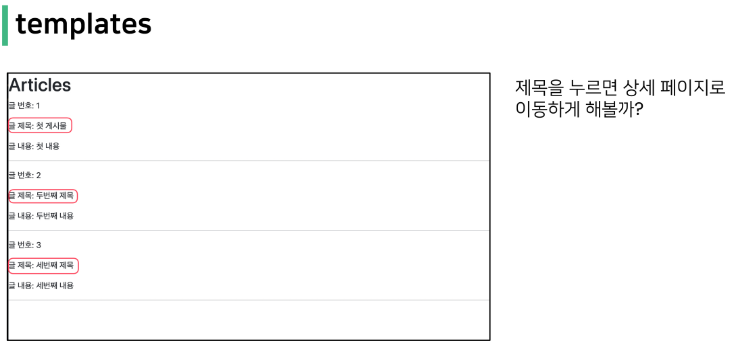

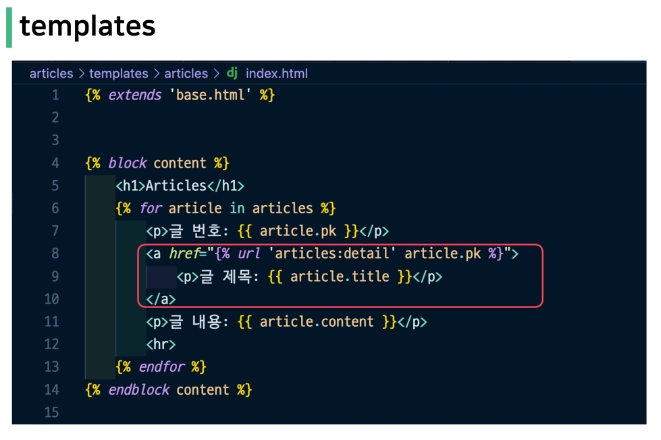

### CREATE

CREATE 로직을 구현하기 위해서는 몇 개의 view 함수가 필요할까?

- 사용자의 입력을 받을 페이지를 렌더링하는 함수 1개  
    - "new" view function

&nbsp;

- 사용자가 입력한 데이터를 전송 받아 DB에 저장하는 함수 1개
    - "create" view function


<b>new</b>  

```
# articles/urls.py

urlpatterns = [
    ...
    path('new/', views.new, name = 'new'),
]


# articles/views.py

def new(request):
    return render(request, 'articles/new.html')


# articles/templates/articles/new.html

{% extends 'base.html' %}

{% block content %}
  <h1>NEW</h1>
  <hr>

  <form action="{% url 'articles:create' %}" method="GET"> # aritcles의 views.create로 보내!
    <label for="title">title: </label>
    <input type="text" id="title" name="title">
    
    <br>

    <label for="content">content: </label>
    <textarea id="content" name="content"></textarea>
    
    <br>

    <input type="submit">
  </form>

  <hr>
  <a href="{% url 'articles:index' %}">[back]</a>

{% endblock content %}

```



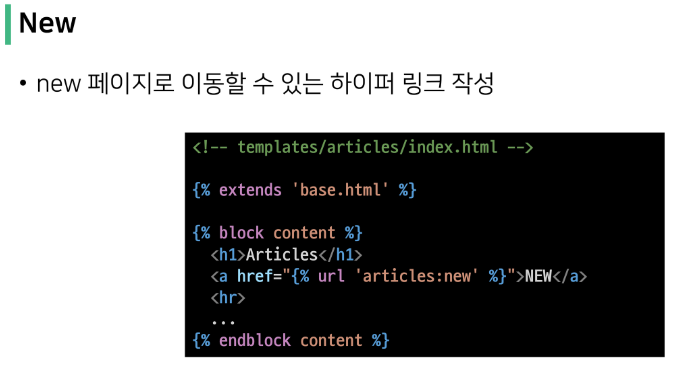

<b>create</b>  

```
# articles/urls.py

urlpatterns = [
    ...
    path('create/', views.create, name='create'),
]


# articles/views.py

from django.shortcuts import render, redirect # redirect import
from .models import Article

...

def create(request):
    title = request.GET.get('title')
    content = request.GET.get('content')

    # DB에 새로운 Article 저장
    # 1.
    # article = Article()
    # article.title = title
    # article.content = content
    # article.save()

    # 2
    # article = Article(title = title, content = content)
    # article.save()

    # 3
    Article.objects.create(title = title, content = content)

    return redirect('articles:index') # 이게 어떻게 DB에 정보를 전달할까?


```

1 또는 2 번째 생성 방식을 사용하는 이유  

- create 메서드가 더 간단해 보이지만 추후 데이터가 저장되기 전에 유효성 검사 과정을 거치게 될 예정  

- 유효성 검사가 진행된 후에 save 메서드가 호출되는 구조를 택하기 위함  


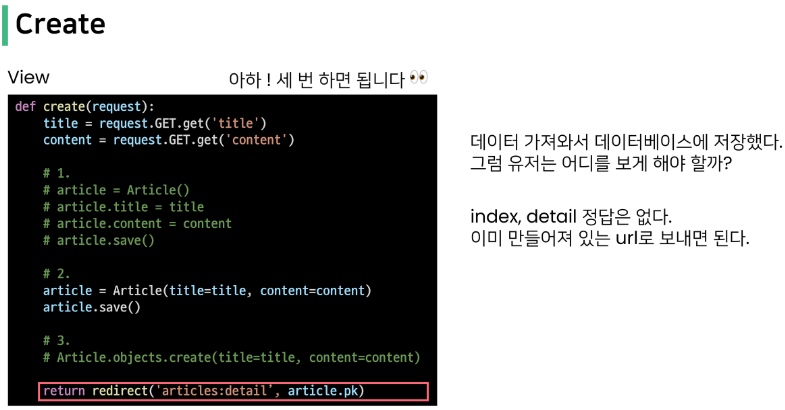

<b>Django shortcut function - "redirect()"</b>  

인자에 작성된 곳으로 다시 요청을 보냄  

사용 가능한 인자  

1. view name (URL pattern name) ```return redirect('articles:index')```  

2. absolute or relative URL ```return redirect('/articles/')```


### HTTP Method



<b>우리의 약속 HTTP</b>  

HTTP?  
- 네트워크 상에서 데이터를 주고 받기 위한 약속  

HTTP Method  
- 데이터(리소스)에 어떤 요청(행동)을 원하는 지를 나타낸 것  

&nbsp;

<b>GET & POST</b>  

GET: 데이터를 가져올 때만 사용(R)  

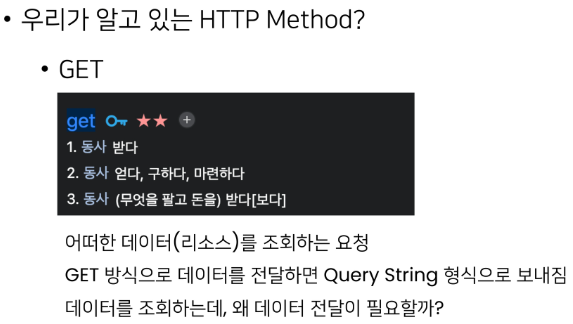

&nbsp;

<b>현재 코드 재검토</b>  

현재는 게시글이 작성될 때 <mark>/articles/create/?title=11&content=22</mark>와 같은 URL로 요청이 됨  

GET은 쿼리 스트링 파라미터로 데이터를 보내기 때문에 url을 통해 데이터를 보냄  

하지만 현재 요청은 데이터를 조회하는 것이 아닌 작성을 원하는 요청  

우리가 원하는 동작이 GET(조회)인가?  

&nbsp;

POST: 데이터베이스를 조작할 때 (CUD)  

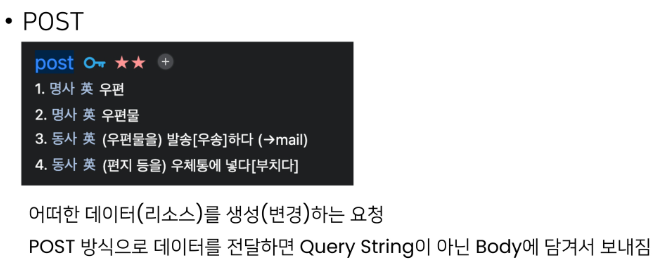

<b>HTTP request method</b>  

Get  

- 특정 리소스를 가져오도록 요청할 때 사용  
- 반드시 데이터를 가졍로 때만 사용해야 함  
- DB에 변화를 주지 않음  
- CRUD에서 R 역할을 담당  

&nbsp;

POST  

- 서버로 데이터를 전송할 때 사용  
- 서버에 변경사항을 만듦  
- 리소스를 생성/변경하기 위해 데이터를 HTTP body에 담아 전송  
- GET의 쿼리 스트링 파라미터와 다르게 URL로 데이터를 보내지 않음  
- CRUD에서 C/U/D 역할을 담당  


<b>POST method 적용하기</b>  

```
# articles/tempaltes/articles/new.html

{% extends 'base.html' %}

{% block content %}
  <h1>NEW</h1>
  <hr>

  <form action="{% url 'articles:create' %}" method="POST">
    <label for="title">title: </label>
    <input type="text" id="title" name="title">
    
    <br>

    <label for="content">content: </label>
    <textarea id="content" name="content"></textarea>
    
    <br>

    <input type="submit">

  </form>

  <hr>
  <a href="{% url 'articles:index' %}">[back]</a>


{% endblock content %}


# 데이터가 담긴 위치가 바뀌었기 때문에 view 함수에서도 다음과 같이 수정 필요  
# articles/views.py

...

def create(request):
    title = request.POST.get('title')
    content = request.POST.get('content')

    # DB에 새로운 Article 저장
    # 1.
    # article = Article()
    # article.title = title
    # article.content = content
    # article.save()

    # 2
    article = Article(title = title, content = content)
    article.save()

    # 3
    # Article.objects.create(title = title, content = content)

    return redirect('articles:index')

```

&nbsp;

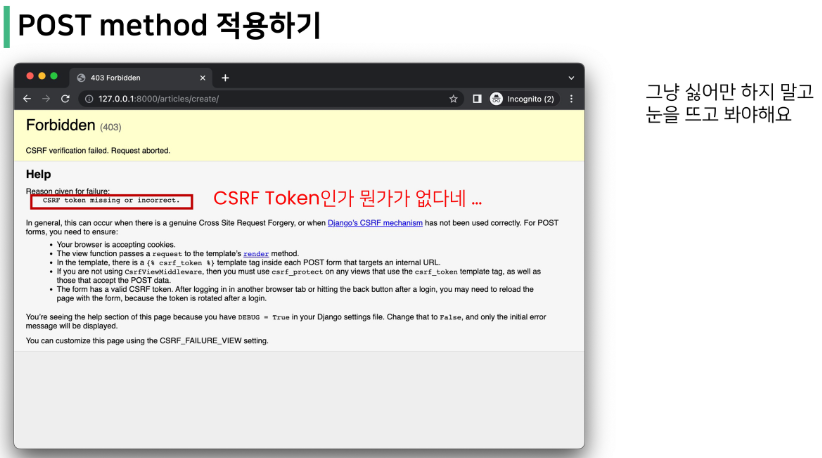

<b>403 Forbidden</b>  

서버에 요청되었지만, 권한 때문에 거절되었다는 것을 의미  

서버에 요청이 도달했으나 서버가 접근을 거부할 때 반환됨  

즉, 게시글을 작성할 권한이 없다 -> Django 입장에서는 "작성자가 누군인지 모르기 때문에 함부로 작성할 수 없다"는 의미  

모델(DB)을 조작하는 것은 단순 조회와 달리 최소한의 신원 확인이 필요하기 때문  


<b>CSRF</b>  

Cross-Site-Request-Forgery(주: forgery: 위조죄)  

"사이트 간 요청 위조"  

사용자가 자신의 의지와 무관하게 공격자가 의도한 행동을 하여 특정 웹 페이지를 보안에 취약하게 하거나 수정, 삭제 등의 작업을 하게 만드는 공격 방법  

실제 사례 - "2008년 옥X 개인 정보 해킹 사건"  

- 해커가 옥X 운영자에게 CSRF 코드가 포함된 가짜 사이트가 담긴 이메일을 보냄  

- 관리자는 해당 사이트에 정보를 입력하여 관련 정보가 해커에게 보내졌고, 해커는 옥X 사이트의 관리자 권한을 얻어냄(당시 1860만건 유출)  

&nbsp;

<b>CSRF 공격 방어</b>  

"Security Token 사용 방식 (CSRF Token)"  

- 사용자의 데이터에 임의의 난수 값(token)을 부여해 매 요청마다 해당 난수 값을 포함시켜 전송 시키도록 함  
- 이후 서버에서 요청을 받을 때마다 전달된 token 값이 유효한지 검증  
- 일반적으로 데이터 변경이 가능한 POST, PATCH, DELETE Method 등에 적용  
- Django는 DTL에서 crsf_token 템플릿 태그를 제공  

&nbsp;

<b>csrf_token 템플릿 태그</b>  

```{% csrf_token}```

해당 태그가 없다면 Django 서버는 요청에 대해 403 forbidden으로 응답  

탬플릿에서 내부 URL로 향하는 Post form을 사용하는 경우에 사용  

- 외부 URL로 향하는 POST form에 대해서는 CSRF 토큰이 유출되어 취약성을 유발할 수 있기 때문에 사용해서는 안됨  

&nbsp;

<b>csrf_token 템플릿 태그 정리</b>  

"csrf_token은 해당 POST 요청이 내가 보낸 것인지를 검증하는 것"  

마지막으로 게시글을 작성하고 문제없이 저장되는지 확인해보기  

```
# articles/templates/articles/new.html

{% extends 'base.html' %}

{% block content %}
  <h1>NEW</h1>
  <hr>

  <form action="{% url 'articles:create' %}" method="POST">
    {% csrf_token %}
    {% comment %} 이 부분! {% endcomment %}
    
    <label for="title">title: </label>
    <input type="text" id="title" name="title">
    
    <br>

    <label for="content">content: </label>
    <textarea id="content" name="content"></textarea>
    
    <br>

    <input type="submit">

  </form>

  <hr>
  <a href="{% url 'articles:index' %}">[back]</a>


{% endblock content %}
```

### DELETE

<b>urls</b>  

삭제하고자 하는 특정 글을 조회 후 삭제해야 함  

```
# articles/urls.py

urlpatterns = [
    ...
    path('<int:pk>/delete/', views.delete, name = 'delete'),
]


# articles/views.py

def delete(request, pk):
    article = Article.objects.get(pk=pk)
    article.delete()
    return redirect('articles:index')
```

&nbsp;

<b>templates</b>  

Detail 페이지에 작성하며 DB에 영향을 미치기 때문에 POST method를  사용  

```
# aritcles/templates/articles/detail.html

{% extends 'base.html' %}

{% block content %}
  <h1>DETAIL</h1>
  <hr>

  <p>글 제목: {{ article.title }}</p>
  <p>글 내용: {{ article.content }}</p>
  <p>글 생성시각: {{ article.created_at }}</p>
  <p>글 수정시각: {{ article.updated_at }}</p>

  <form action="{% url 'articles:delete' article.pk %}" method='POST'>
    {% csrf_token %}

    <input type="submit", value="DELETE">
  </form>

  <a href="{% url 'articles:index' %}">목록보기</a>
{% endblock content %}

```

### UPDATE

<b>개요</b>  

수정은 CREATE 로직과 마찬가지로 2개의 view 함수가 필요  

사용자의 입력을 받을 페이지를 렌더링 하는 함수 1개  

- "edit" view function  

사용자가 입력한 데이터를 전송 받아 DB에 저장하는 함수 1개  

- "update" view function

&nbsp;

<b>Edit - urls&views</b>

```
### edit

# articles/url.py

urlpatterns = [
    ...
    path('<int:pk>/edit/', views.edit, name = 'edit'),
]


# articles/views.py

...
def edit(request, pk):
    article = Article.objects.get(pk=pk)
    
    context = {
        'article': article,
    }

    return render(request, 'articles/edit.html', context)


# html 태그의 value 속성을 사용해 기존에 입력되어 있던 데이터를 출력  
# articles/templates/articles/edit.html

{% extends 'base.html' %}

{% block content %}
  <h1>EDIT</h1>
  
  <form action="#" method='POST'>
    {% csrf_token %}
    <label for="title">title: </label>
    <input type="text" id="title" name="title" value=" {{ article.title }}">

    <br>

    <label for="content">content: </label>
    <textarea name="content" id="content">{{ article.content }}</textarea>
    
    <br>

    <input type="submit">

  </form>

  <hr>
  <a href="{% url 'articles:index' %}">[back]</a>

{% endblock content %}


# articles/templates/articles/detail.html  

{% extends 'base.html' %}

{% block content %}
  <h1>DETAIL</h1>
  <hr>

  <p>글 제목: {{ article.title }}</p>
  <p>글 내용: {{ article.content }}</p>
  <p>글 생성시각: {{ article.created_at }}</p>
  <p>글 수정시각: {{ article.updated_at }}</p>

  <a href="{% url 'articles:edit' article.pk %}">EDIT</a>
  <form action="{% url 'articles:delete' article.pk %}" method='POST'>
    {% csrf_token %}

    <input type="submit", value="DELETE">
  </form>

  <a href="{% url 'articles:index' %}">목록보기</a>
{% endblock content %}


### update 

# articles/urls.py

urlpatterns = [
    ...
    path('<int:pk>/update/', views.update, name ='update'),
]


# articles/views.py

...
def update(request, pk):
    article = Article.objects.get(pk=pk)
    article.title = request.POST.get('title')
    article.content = request.POST.get('content')
    article.save()

    return redirect('articles:detail', article.pk)


# articles/templates/articles/edit.html

{% extends 'base.html' %}

{% block content %}
  <h1>EDIT</h1>
  
  <form action="{% url 'articles:update' article.pk %}" method='POST'>
    {% csrf_token %}
    <label for="title">title: </label>
    <input type="text" id="title" name="title" value=" {{ article.title }}">

    <br>

    <label for="content">content: </label>
    <textarea name="content" id="content">{{ article.content }}</textarea>
    
    <br>

    <input type="submit">

  </form>

  <hr>
  <a href="{% url 'articles:index' %}">[back]</a>

{% endblock content %}

```

### Handling HTTP requests

<b>개요</b>  

"HTTP requests 처리에 따른 view 함수 구조 변화"  

new-create, edit-update의 view 함수의 역학을 잘 살펴보면 하나의 공통점과 하나의 차이점이 있음  

공통점

- new-create는 모두 CREATE 로직을 구현하기 위한 공통 목적  
- edit-update는 모두 UPDATE 로직을 구현하기 위한 공통 목적  

&nbsp;

차이점  

- new와 eidt은 GET에 대한 요청에 대한 처리만을
- create와 update는 post 요청에 대한 처리만을 진행  

&nbsp;

이 공통점과 차이점을 기반으로, 하나의 view 함수에서 method에 따라 로직이 분리되도록 변경  

<b>Create</b>  

new와 create view 함수를 합침  

각각의 역할은 request.method 값을 기준으로 나눔  

```
# after (create)
# articles/views.py

def create(request):
    if request.method == 'POST':
        title = request.POST.get('title')
        content = request.POST.get('content') 
        article = Article(title = title, content = content)
        article.save()
        return redirect('articles:detail', pk = article.pk)
    else:
        return render(request, 'articles/create.html')


# 불필요한 views에서의 new와 urls 에서 new를 제거  

# articles/views.py
# def new(request):
#     return render(request, 'articles/new.html')

# articles/urls.py
# path('new/', views.new, name = 'new'),


# aritcles/templates/articles/create.html

{% extends 'base.html' %}

{% block content %}
  <h1>CREATE</h1>
  <hr>

  <form action="{% url 'articles:create' %}" method="POST">
    {% csrf_token %}
    
    <label for="title">title: </label>
    <input type="text" id="title" name="title">
    
    <br>

    <label for="content">content: </label>
    <textarea id="content" name="content"></textarea>
    
    <br>

    <input type="submit">

  </form>

  <hr>
  <a href="{% url 'articles:index' %}">[back]</a>


{% endblock content %}

```

<b>update</b>  

```
# edit과 update view 함수를 합침  
# articles/views.py

...
def update(request, pk):
    article = Article.objects.get(pk=pk)
    
    if request.method == 'POST':
        article.title = request.POST.get('title')
        article.content = request.POST.get('content')
        article.save()

        return redirect('articles:detail', article.pk)
    else:
        context = {'article': article}
        return render(request, 'articles/update.html', context)


# edit 생략

# def edit(request, pk):
#     article = Article.objects.get(pk=pk)
    
#     context = {
#         'article': article,
#     }

#     return render(request, 'articles/edit.html', context)


# articles/urls.py
# edit 생략
# path('<int:pk>/edit/', views.edit, name = 'edit'),


# articles/templates/articles/update.html

{% extends 'base.html' %}

{% block content %}
  <h1>UPDATE</h1>
  
  <form action="{% url 'articles:update' article.pk %}" method='POST'>
    {% csrf_token %}
    <label for="title">title: </label>
    <input type="text" id="title" name="title" value=" {{ article.title }}">

    <br>

    <label for="content">content: </label>
    <textarea name="content" id="content">{{ article.content }}</textarea>
    
    <br>

    <input type="submit">

  </form>

  <hr>
  <a href="{% url 'articles:index' %}">[back]</a>

{% endblock content %}


# articles/templates/articles/detail.html

{% extends 'base.html' %}

{% block content %}
  <h1>DETAIL</h1>
  <hr>

  <p>글 제목: {{ article.title }}</p>
  <p>글 내용: {{ article.content }}</p>
  <p>글 생성시각: {{ article.created_at }}</p>
  <p>글 수정시각: {{ article.updated_at }}</p>

  <a href="{% url 'articles:update' article.pk %}">UPDATE</a>
  <form action="{% url 'articles:delete' article.pk %}" method='POST'>
    {% csrf_token %}

    <input type="submit", value="DELETE">
  </form>

  <a href="{% url 'articles:index' %}">목록보기</a>
{% endblock content %}

```

<b>DELETE</b>

POST 요청에 대해서만 삭제가 가능하도록 수정

```
def delete(request, pk):
    article = Article.objects.get(pk=pk)

    if request.method == "POST":
        article.delete()
        return redirect('articles:index')
    else:
        redirect('articles:detail', article.pk)
```